<a href="https://colab.research.google.com/github/SvetlanaTsim/ml_in_business/blob/main/course_project/25_01_gb_ml_course_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Модель оттока для данных по телекому Telco Customer Churn

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## About Dataset
### Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

### Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

### The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

#Шаг 1 Обучение модели

In [1044]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

# 1. Загрузка данных

In [1045]:
pd.set_option('display.max_columns', None)

Ссылка на google drive: https://drive.google.com/file/d/1lh7xHLCg-FluHkYYJweCA_O5iuTZFUcc


In [1046]:
!wget 'https://drive.google.com/uc?export=download&id=1lh7xHLCg-FluHkYYJweCA_O5iuTZFUcc' -O churn_data.csv

--2023-01-25 10:43:39--  https://drive.google.com/uc?export=download&id=1lh7xHLCg-FluHkYYJweCA_O5iuTZFUcc
Resolving drive.google.com (drive.google.com)... 74.125.142.102, 74.125.142.138, 74.125.142.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-bs-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qiqk17o5ijgd2nh7m761craucldibrik/1674643350000/04420567413078840451/*/1lh7xHLCg-FluHkYYJweCA_O5iuTZFUcc?e=download&uuid=6e67f361-1c98-41f9-a113-3e2c9c45dc21 [following]
--2023-01-25 10:43:40--  https://doc-0g-bs-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qiqk17o5ijgd2nh7m761craucldibrik/1674643350000/04420567413078840451/*/1lh7xHLCg-FluHkYYJweCA_O5iuTZFUcc?e=download&uuid=6e67f361-1c98-41f9-a113-3e2c9c45dc21
Resolving doc-0g-bs-docs.googleusercontent.com (doc-0g-bs-docs.googleusercontent.com)... 74.125.197.132, 2607:

In [1047]:
df = pd.read_csv('churn_data.csv', sep = ',')


In [1048]:
#df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', sep = ',')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1049]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [1050]:
#нет пропусков
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [1051]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [1052]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [1053]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [1054]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# 2. Анализ данных

### Корреляция признаков

Признак TotalCharges сильно коррелирует с признаками tenure и MonthlyCharges, поэтому его нужно будет удалить. 

In [1055]:
df = df.drop('TotalCharges', axis = 1)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


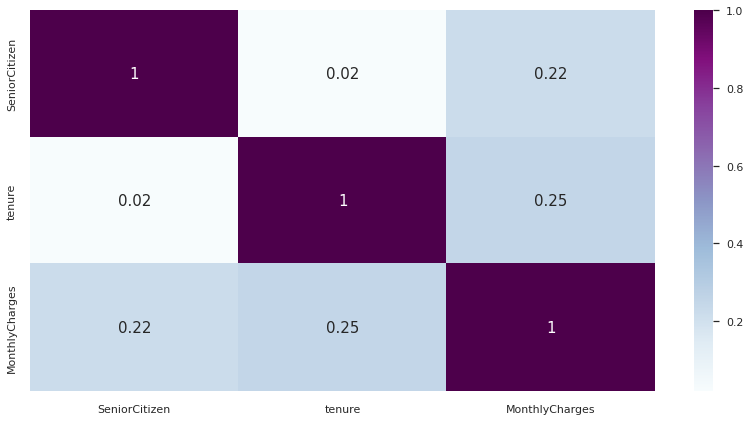

In [1056]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'BuPu')

### Категорийные переменные

In [1057]:
df.drop('customerID', axis = 1, inplace=True)

In [1058]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn'],
      dtype='object')

In [1059]:
cat_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                'PaymentMethod', 'Churn']

In [1060]:
for i in cat_features:
  print(df[i].value_counts())
  print('-' * 30)

Male      3555
Female    3488
Name: gender, dtype: int64
------------------------------
No     3641
Yes    3402
Name: Partner, dtype: int64
------------------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64
------------------------------
Yes    6361
No      682
Name: PhoneService, dtype: int64
------------------------------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
------------------------------
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
------------------------------
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
------------------------------
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
------------------------------
No                     3095
Yes                    2422
No internet service    1526
Name: 

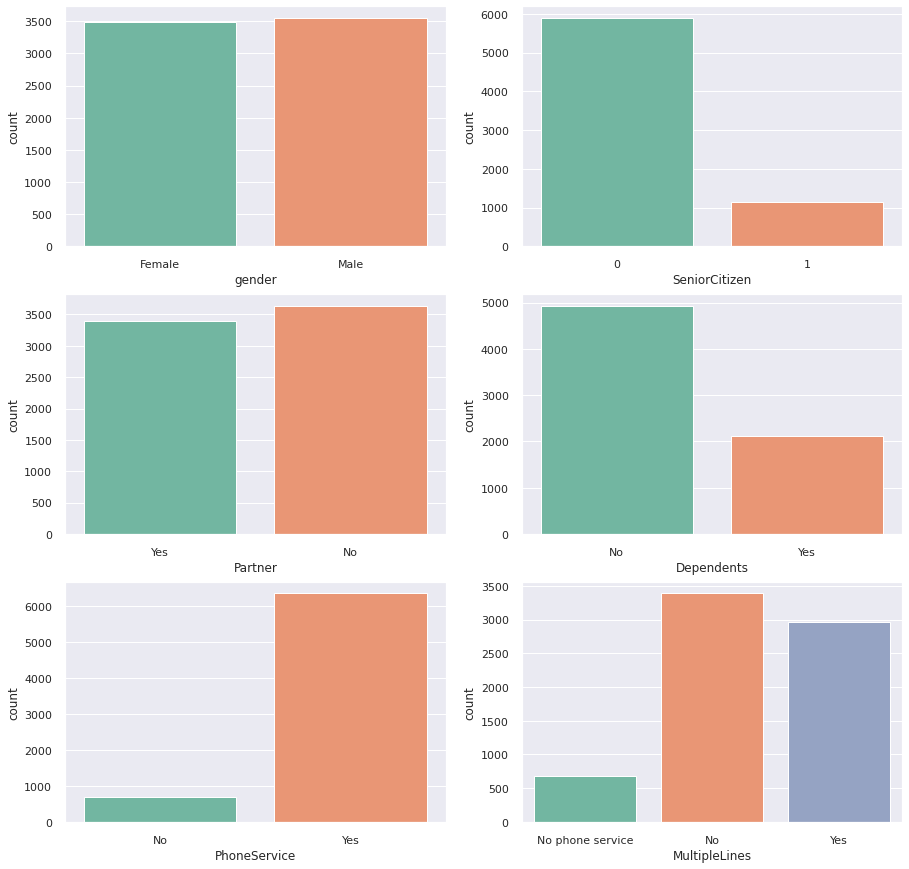

In [1061]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'gender', palette = 'Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'SeniorCitizen', palette = 'Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'Partner', palette = 'Set2', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'Dependents', palette = 'Set2', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'PhoneService', palette = 'Set2', data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'MultipleLines', palette = 'Set2', data = df)

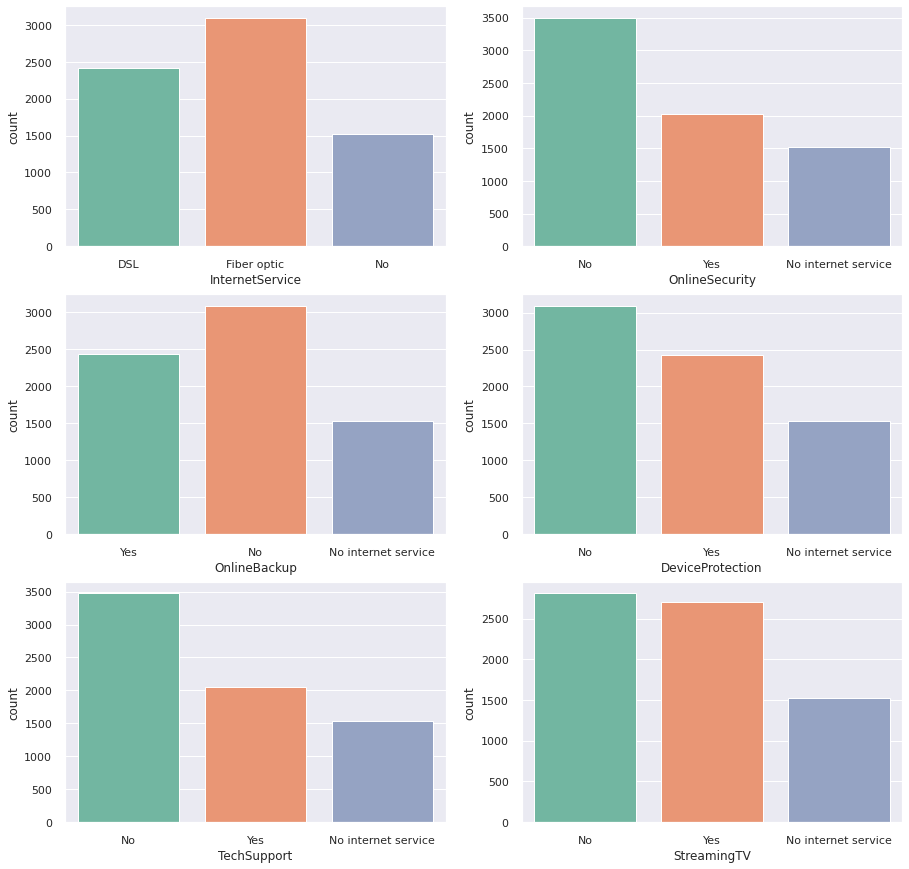

In [1062]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'InternetService', palette = 'Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'OnlineSecurity', palette = 'Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'OnlineBackup', palette = 'Set2', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'DeviceProtection', palette = 'Set2', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'TechSupport', palette = 'Set2', data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'StreamingTV', palette = 'Set2', data = df)

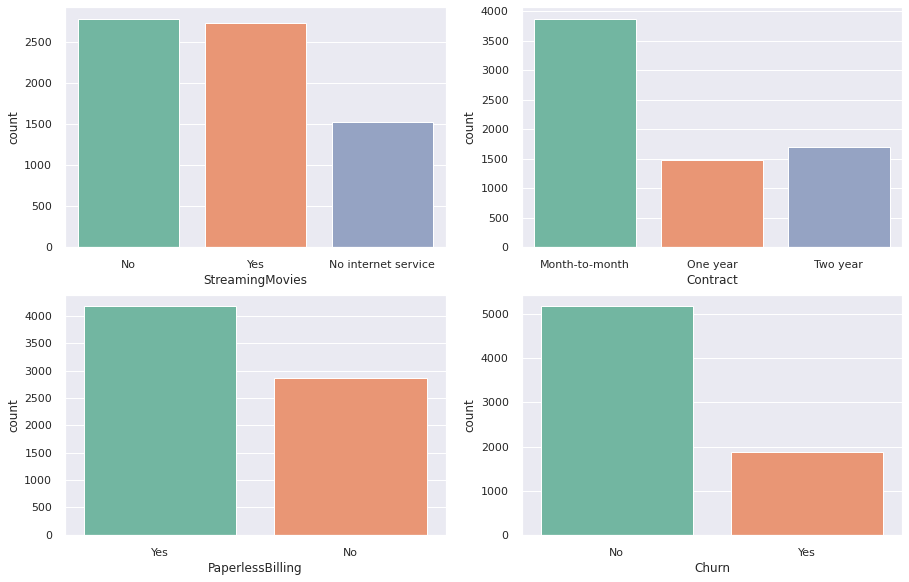

In [1063]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'StreamingMovies', palette = 'Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'Contract', palette = 'Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'PaperlessBilling', palette = 'Set2', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'Churn', palette = 'Set2', data = df)

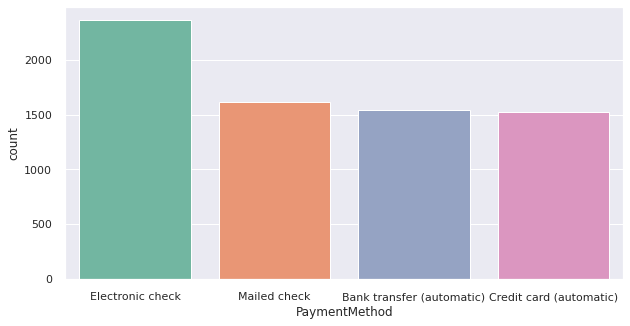

In [1064]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'PaymentMethod', palette = 'Set2', data = df)

### Непрерывные переменные

Несмотря на немного странное распределение, судя по бокслотам - выбросов нет.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


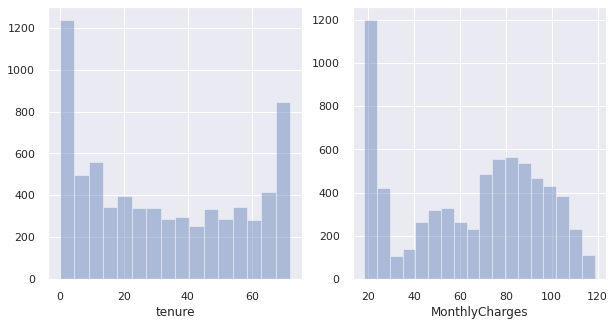

In [1065]:
plt.figure(figsize = (10,5))
sns.set(color_codes = True)

plt.subplot(1,2,1)
sns.distplot(df['tenure'], kde = False)

plt.subplot(1,2,2)
sns.distplot(df['MonthlyCharges'], kde = False)

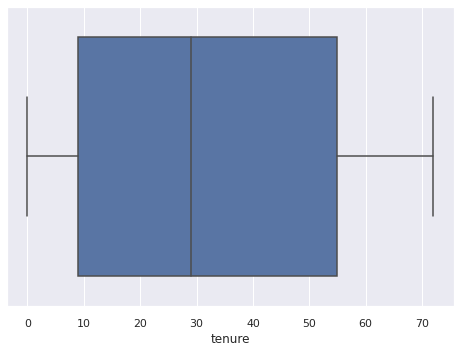

In [1066]:
sns.boxplot(x=df["tenure"])

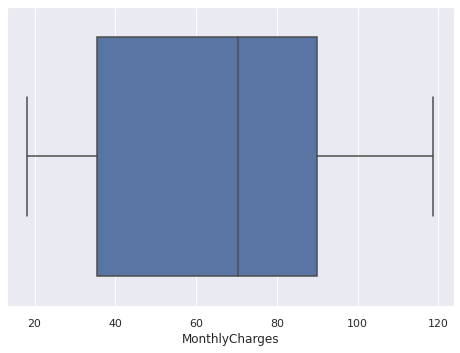

In [1067]:
sns.boxplot(x=df["MonthlyCharges"])

###Бинарные переменные

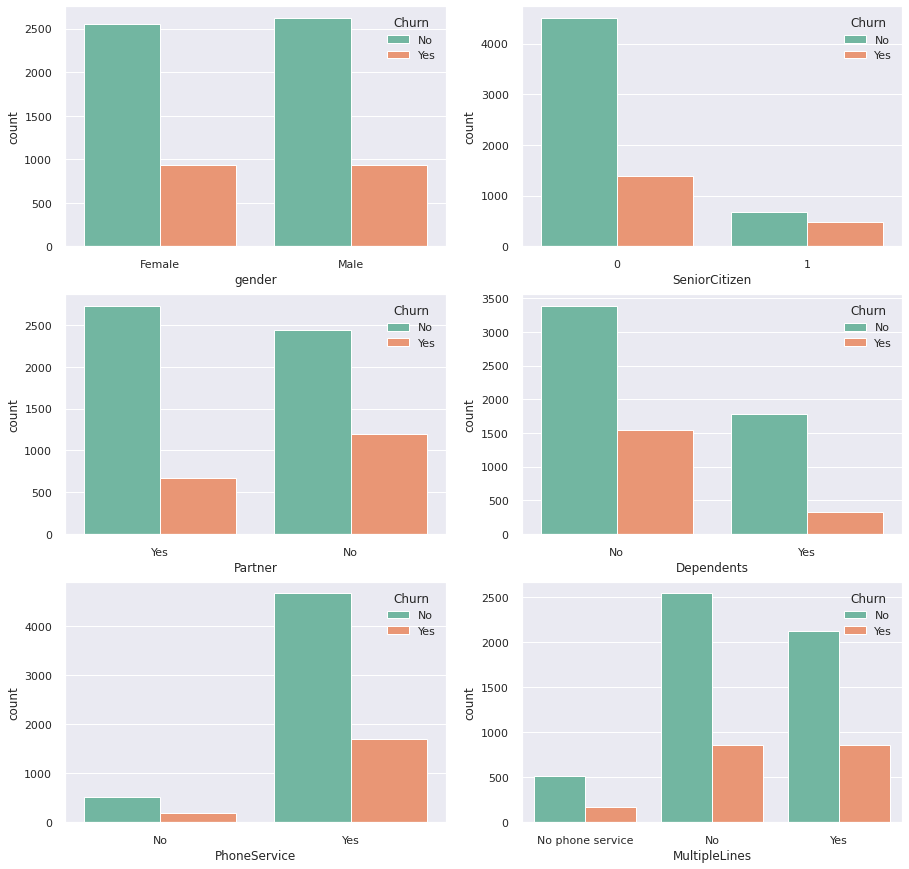

In [1068]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'gender', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'SeniorCitizen', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'Partner', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'Dependents', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'PhoneService', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'MultipleLines', hue = 'Churn', palette = 'Set2', data = df)

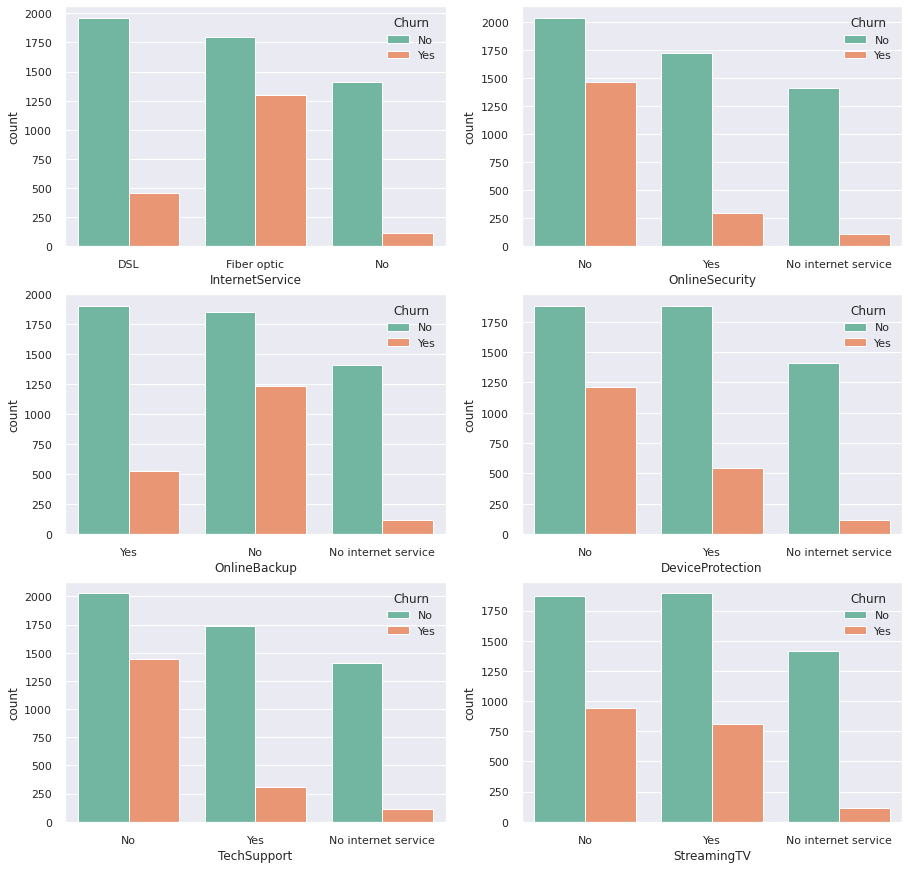

In [1069]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'InternetService', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'OnlineSecurity', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'OnlineBackup', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'DeviceProtection', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'TechSupport', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'StreamingTV', hue = 'Churn', palette = 'Set2', data = df)

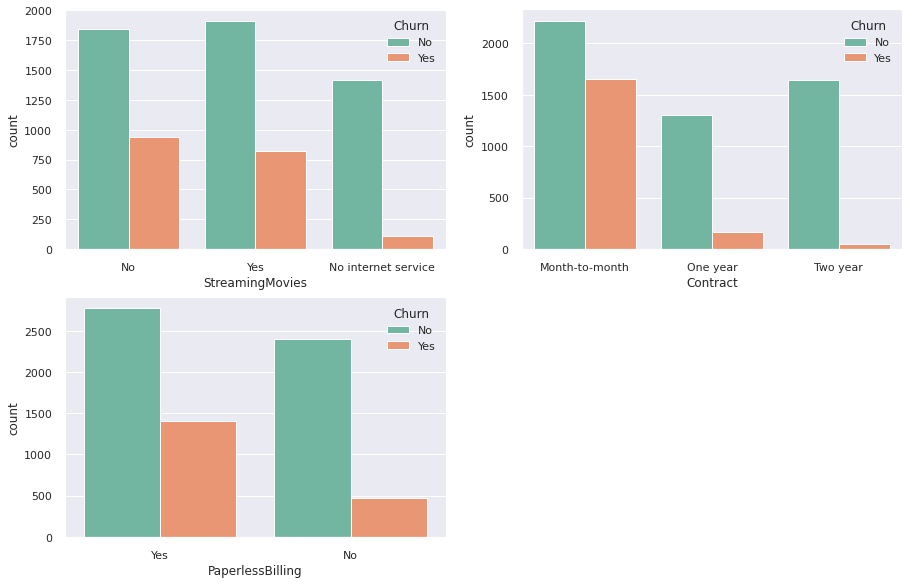

In [1070]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'StreamingMovies', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'Contract', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'PaperlessBilling', hue = 'Churn', palette = 'Set2', data = df)


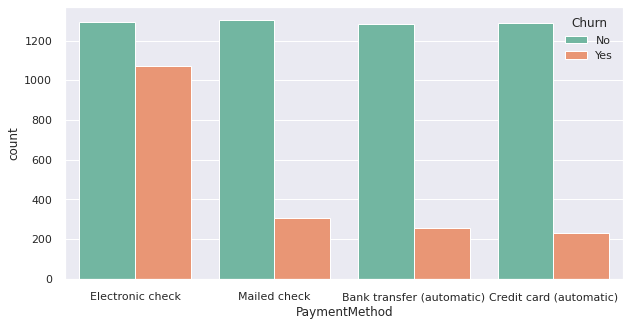

In [1071]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'PaymentMethod', hue = 'Churn', palette = 'Set2', data = df)

Когда мы анализируем переменную Tenure, мы можем сделать вывод, что более низкие значения с большей вероятностью являются оттоком.

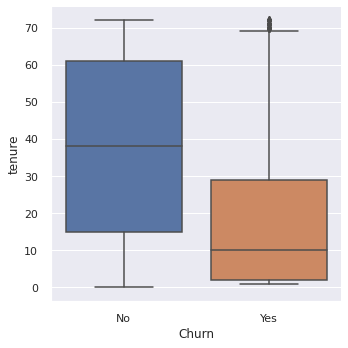

In [1072]:
sns.catplot(x = 'Churn', y="tenure", kind="box", data = df)

В переменной MonthlyCharge отток смешивается с неоттоком, и всё же отток находится чуть более высоко. 

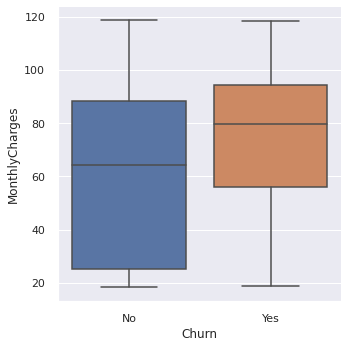

In [1073]:
sns.catplot(x = 'Churn', y="MonthlyCharges", kind="box", data = df)

Если сравнить переменную Tenure с переменной Monthly Charge, не видно никакой взаимосвязи.

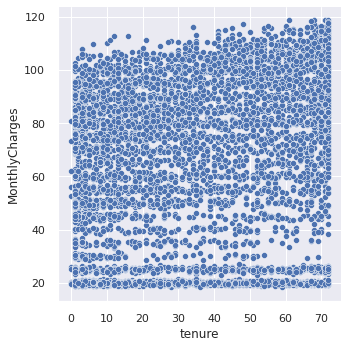

In [1074]:
sns.relplot(x='tenure', y = 'MonthlyCharges' , data = df)

# 3. Pipeline для обработки данных, построение модели

In [1075]:
df = pd.read_csv('churn_data.csv', sep = ',')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1076]:
df.iloc[:,0].head()

0    7590-VHVEG
1    5575-GNVDE
2    3668-QPYBK
3    7795-CFOCW
4    9237-HQITU
Name: customerID, dtype: object

In [1077]:
df = df.replace({'Churn' : { 'Yes' : 1, 'No' : 0}})
df['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [1078]:
X  = df.drop('Churn', axis=1)
y = df['Churn']

Сделаем балансировку классов

In [1079]:
from imblearn.over_sampling import RandomOverSampler

In [1080]:
ros = RandomOverSampler(random_state=0)

X, y = ros.fit_resample(X, y)

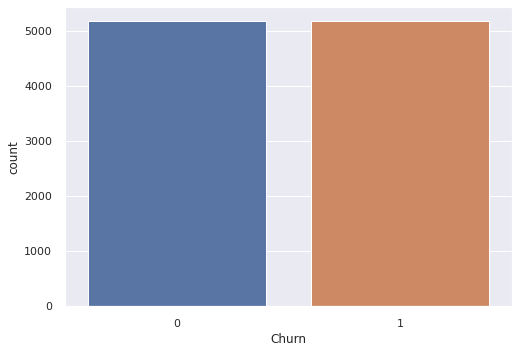

In [1081]:
ax = sns.countplot(x=y)

In [1082]:
X.shape, y.shape

((10348, 20), (10348,))

In [1083]:
#разделим данные на train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Сохраним данные трейна и теста

In [1084]:
# save test
X_test.to_csv("X_test.csv", index=None)
y_test.to_csv("y_test.csv", index=None)

# save train
X_train.to_csv("X_train.csv", index=None)
y_train.to_csv("y_train.csv", index=None)

In [1085]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
#from sklearn.preprocessing import LabelEncoder

#соберем наш простой pipeline, но нам понадобится написать класс для выбора нужного поля
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]
    

class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]


# class BinaryEncoder(BaseEstimator, TransformerMixin):
#     """
#     Transformer to replace "Yes" and "No" with 1 and 0
#     """
#     def __init__(self, key):
#         self.key = key

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         X = X.replace({self.key : { 'Yes' : 1, 'No' : 0}})
#         return X[[self.key]]

class OHEEncoderBin(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        B = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        self.columns = B[:1]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
    
        return X[self.columns]  


class TextImputer(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.mode = None
    
    def fit(self, X, y=None):
        self.mode = X[self.key].mode()[0]
        return self
    
    def transform(self, X):
        X[self.key] = X[self.key].fillna(self.mode)
        return X


class NumImputer(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.median = None
    
    def fit(self, X, y=None):
        self.median = X[self.key].median()
        return self
    
    def transform(self, X):
        X[self.key] = X[self.key].fillna(self.median)
        return X

In [1086]:
#не берем 'TotalCharges' и 'customerID'
X_train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [1087]:
# Male      3555
# Female    3488
# Name: gender, dtype: int64
# ------------------------------
# No     3641
# Yes    3402
# Name: Partner, dtype: int64
# ------------------------------
# No     4933
# Yes    2110
# Name: Dependents, dtype: int64
# ------------------------------
# Yes    6361
# No      682
# Name: PhoneService, dtype: int64
# ------------------------------
# No                  3390
# Yes                 2971
# No phone service     682
# Name: MultipleLines, dtype: int64
# ------------------------------
# Fiber optic    3096
# DSL            2421
# No             1526
# Name: InternetService, dtype: int64
# ------------------------------
# No                     3498
# Yes                    2019
# No internet service    1526
# Name: OnlineSecurity, dtype: int64
# ------------------------------
# No                     3088
# Yes                    2429
# No internet service    1526
# Name: OnlineBackup, dtype: int64
# ------------------------------
# No                     3095
# Yes                    2422
# No internet service    1526
# Name: DeviceProtection, dtype: int64
# ------------------------------
# No                     3473
# Yes                    2044
# No internet service    1526
# Name: TechSupport, dtype: int64
# ------------------------------
# No                     2810
# Yes                    2707
# No internet service    1526
# Name: StreamingTV, dtype: int64
# ------------------------------
# No                     2785
# Yes                    2732
# No internet service    1526
# Name: StreamingMovies, dtype: int64
# ------------------------------
# Month-to-month    3875
# Two year          1695
# One year          1473
# Name: Contract, dtype: int64
# ------------------------------
# Yes    4171
# No     2872
# Name: PaperlessBilling, dtype: int64
# ------------------------------
# Electronic check             2365
# Mailed check                 1612
# Bank transfer (automatic)    1544
# Credit card (automatic)      1522
# Name: PaymentMethod, dtype: int64
# ------------------------------
# No     5174
# Yes    1869
# Name: Churn, dtype: int64

In [1088]:
# categorical_columns = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
#                        'StreamingMovies', 'Contract', 'PaymentMethod', 'PhoneService', 'PaperlessBilling']
# continuous_columns = ['tenure', 'MonthlyCharges', ]
# binary_columns = ['SeniorCitizen', 'Partner', 'Dependents']


categorical_columns = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                       'StreamingMovies', 'Contract', 'PaymentMethod', 'PhoneService', 'PaperlessBilling', 'SeniorCitizen', 'Partner', 'Dependents']
continuous_columns = ['tenure', 'MonthlyCharges', ]

In [1089]:
from sklearn.pipeline import FeatureUnion

Теперь нам нужно под каждый признак создать трансформер и объединить их в список.

In [1090]:
final_transformers = list()

for cat_col in categorical_columns:
    cat_transformer = Pipeline([
                ('imputer', TextImputer(cat_col)),
                ('selector', FeatureSelector(column=cat_col)),
                ('ohe', OHEEncoder(key=cat_col))
            ])
    
    final_transformers.append((cat_col, cat_transformer))
    
for cont_col in continuous_columns:
    cont_transformer = Pipeline([
                ('imputer', NumImputer(cont_col)),
                ('selector', NumberSelector(key=cont_col))
            ])
    
    final_transformers.append((cont_col, cont_transformer))
       
# for bin_col in binary_columns:
#     bin_transformer = Pipeline([
#                 ('imputer', TextImputer(bin_col)),
#                 ('selector', NumberSelector(key=bin_col)),
#                 ('bie', OHEEncoderBin(key=bin_col))
#             ])
#     final_transformers.append((bin_col, bin_transformer))

In [1091]:
final_transformers

[('gender', Pipeline(steps=[('imputer', TextImputer(key='gender')),
                  ('selector', FeatureSelector(column='gender')),
                  ('ohe', OHEEncoder(key='gender'))])),
 ('MultipleLines',
  Pipeline(steps=[('imputer', TextImputer(key='MultipleLines')),
                  ('selector', FeatureSelector(column='MultipleLines')),
                  ('ohe', OHEEncoder(key='MultipleLines'))])),
 ('InternetService',
  Pipeline(steps=[('imputer', TextImputer(key='InternetService')),
                  ('selector', FeatureSelector(column='InternetService')),
                  ('ohe', OHEEncoder(key='InternetService'))])),
 ('OnlineSecurity',
  Pipeline(steps=[('imputer', TextImputer(key='OnlineSecurity')),
                  ('selector', FeatureSelector(column='OnlineSecurity')),
                  ('ohe', OHEEncoder(key='OnlineSecurity'))])),
 ('OnlineBackup', Pipeline(steps=[('imputer', TextImputer(key='OnlineBackup')),
                  ('selector', FeatureSelector(column='Onl

Объединим все это в единый пайплайн

In [1092]:
feats = FeatureUnion(final_transformers)

feature_processing = Pipeline([('feats', feats)])

Теперь у нас есть пайплайн, который готовит признаки для моделирования.

Добавим модель и балансировку классов

In [1093]:
from sklearn.ensemble import ExtraTreesClassifier

pipeline = Pipeline([
    ('features', feats),
    ('classifier', ExtraTreesClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0))
])

In [1094]:
# обучим наш пайплайн
pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('gender',
                                                 Pipeline(steps=[('imputer',
                                                                  TextImputer(key='gender')),
                                                                 ('selector',
                                                                  FeatureSelector(column='gender')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='gender'))])),
                                                ('MultipleLines',
                                                 Pipeline(steps=[('imputer',
                                                                  TextImputer(key='MultipleLines')),
                                                                 ('selector',
                                                                  Featu

In [1095]:
# наши прогнозы для тестовой выборки
preds_prob = pipeline.predict_proba(X_test)[:, 1]
preds_prob[:10]

array([0.17, 0.03, 1.  , 0.59, 0.02, 1.  , 0.02, 0.34, 1.  , 1.  ])

In [1096]:
#пока просто посмотрим на стандартные прогнозы
preds = pipeline.predict(X_test)

preds[:10]

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1])

In [1097]:
#посмотрим статистку со базовым прогнозом. f1 score по 1му классу - 0.89, что очень хорошо
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1290
           1       0.85      0.93      0.89      1297

    accuracy                           0.88      2587
   macro avg       0.88      0.88      0.88      2587
weighted avg       0.88      0.88      0.88      2587



Также нам нужно от вероятностей перейти к меткам классов. Для этого нужно подобрать порог, после которого мы считаем, что объект можно отнести к классу 1 (если вероятность больше порога - размечаем объект как класс 1, если нет - класс 0)

In [1098]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, classification_report, precision_recall_curve, confusion_matrix

In [1099]:
precision, recall, thresholds = precision_recall_curve(y_test, preds_prob)

fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print(f'Best Threshold={thresholds[ix]}, F-Score={fscore[ix]:.3f}, Precision={precision[ix]:.3f}, Recall={recall[ix]:.3f}')

Best Threshold=1.0, F-Score=0.930, Precision=0.996, Recall=0.872


In [1100]:
precision, recall, thresholds

(array([0.50135292, 0.56111353, 0.58058691, 0.58084914, 0.59032258,
        0.59915612, 0.61199041, 0.61228407, 0.61941748, 0.62857143,
        0.63636364, 0.63668166, 0.637     , 0.64408493, 0.65048544,
        0.65786749, 0.6671916 , 0.67320955, 0.68154922, 0.68191604,
        0.6863809 , 0.68675353, 0.69205479, 0.69701987, 0.69740475,
        0.703125  , 0.70873239, 0.71396141, 0.71853547, 0.71894677,
        0.72453704, 0.72833042, 0.73270809, 0.74212715, 0.74432497,
        0.74655482, 0.7470024 , 0.75226586, 0.75591985, 0.75963303,
        0.76590488, 0.77085928, 0.77133956, 0.77589454, 0.78002528,
        0.78694818, 0.79150579, 0.79201545, 0.79520415, 0.79973907,
        0.80367695, 0.81034483, 0.81009296, 0.81145903, 0.81417112,
        0.81471572, 0.81787634, 0.82552614, 0.83003413, 0.83060109,
        0.83597519, 0.83712905, 0.83958333, 0.84604619, 0.8477193 ,
        0.84897671, 0.85490754, 0.85724483, 0.86083214, 0.86517664,
        0.86884058, 0.87263464, 0.87399267, 0.87

In [1101]:
fscore

array([0.66786818, 0.71746385, 0.73234624, 0.73255483, 0.73896741,
       0.7451895 , 0.75458309, 0.75480627, 0.76020256, 0.76705741,
       0.77235526, 0.77258945, 0.77282378, 0.77801527, 0.78242163,
       0.78724063, 0.79387883, 0.79761157, 0.80291508, 0.80316957,
       0.80573248, 0.80598917, 0.80909673, 0.8124799 , 0.81274131,
       0.81579799, 0.81901042, 0.82249101, 0.82495895, 0.82522996,
       0.8277686 , 0.83023873, 0.83250083, 0.83825503, 0.83877482,
       0.84018881, 0.84047218, 0.84349593, 0.84578804, 0.84720327,
       0.85048011, 0.85291078, 0.85320469, 0.85536332, 0.8572421 ,
       0.86013986, 0.86285514, 0.86315789, 0.86408451, 0.8664311 ,
       0.86808511, 0.87130125, 0.8704959 , 0.87062187, 0.87218045,
       0.87249284, 0.87396768, 0.87797834, 0.88052136, 0.88084028,
       0.88282387, 0.88346686, 0.88344903, 0.88701394, 0.88758266,
       0.88651437, 0.88938217, 0.8902891 , 0.89186176, 0.89418778,
       0.89577886, 0.89779109, 0.89631856, 0.89665539, 0.89766

In [1102]:
best_thresh = 0.99

In [1103]:
print(classification_report(y_test, preds_prob > best_thresh))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1290
           1       1.00      0.87      0.93      1297

    accuracy                           0.93      2587
   macro avg       0.94      0.93      0.93      2587
weighted avg       0.94      0.93      0.93      2587



Отрисуем матрицу ошибок

In [1104]:
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1285    5]
 [ 166 1131]]


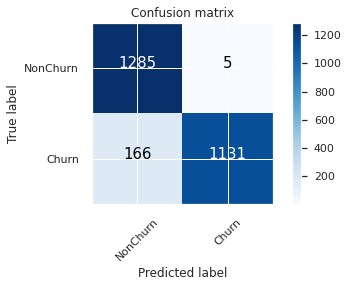

In [1105]:
# мы уже нашли ранее "оптимальный" порог, когда максимизировали f_score
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, preds_prob >  best_thresh)
plt.figure(figsize=(6, 4))
plot_confusion_matrix(cnf_matrix, classes=['NonChurn', 'Churn'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

Можно отметить, что как мы и видели в classification_report, у нас хорошая точность, то есть мы почти всех людей, которые ушли в отток, классифицируем верно. Немного просел recall, то есть мы не нашли 166 людей, которые ушли в отток.

При анализе модели оттока ясно, что более важна precision, так как тем людям, кто идет в отток будут делаться специальные предложения, что затратно для компании. Поэтому важно не находить людей, кто не собирается в отток, чтобы компания не несла лишних затрат.

F_1 score по 1му классу 0.93. Соответственно данную модель считаю оптимальной.

Сохраним модель (пайплайн)

In [1106]:
import dill
with open("extratrees_pipeline.dill", "wb") as f:
    dill.dump(pipeline, f)

# Шаг 2 - PREDICT

### Проверка работоспособности и качества пайплайна

Здесь мы еще не запускаем никакое API, а загружаем модель (pipeline) напрямую и проверяем на отложенной (тестовой) выборке

In [1107]:
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")

In [1108]:
X_test.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,3877-JRJIP,Male,0,No,No,1,Yes,Yes,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,59.85,59.85
1,5025-GOOKI,Female,0,No,No,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),18.90,347.65
2,9894-EZEWG,Female,0,No,No,1,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.30,74.3


In [1109]:
with open('extratrees_pipeline.dill', 'rb') as in_strm:
    pipeline = dill.load(in_strm)

In [1110]:
pipeline

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('gender',
                                                 Pipeline(steps=[('imputer',
                                                                  TextImputer(key='gender')),
                                                                 ('selector',
                                                                  FeatureSelector(column='gender')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='gender'))])),
                                                ('MultipleLines',
                                                 Pipeline(steps=[('imputer',
                                                                  TextImputer(key='MultipleLines')),
                                                                 ('selector',
                                                                  Featu

In [1111]:
preds = pipeline.predict_proba(X_test)[:, 1]

pred_df = pd.DataFrame({'preds': preds})
pred_df.to_csv("test_predictions.csv", index=None)

In [1112]:
preds[:10]

array([0.17, 0.03, 1.  , 0.59, 0.02, 1.  , 0.02, 0.34, 1.  , 1.  ])

In [1113]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)

fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print(f'Best Threshold={thresholds[ix]}, F-Score={fscore[ix]:.3f}, Precision={precision[ix]:.3f}, Recall={recall[ix]:.3f}')

Best Threshold=1.0, F-Score=0.930, Precision=0.996, Recall=0.872


In [1114]:
gender = np.nan
multiple_lines = np.nan
internet_service = np.nan
online_security = np.nan
online_backup = np.nan
device_protection = np.nan
tech_support = np.nan
streaming_tv = np.nan
streaming_movies = np.nan
contract = np.nan
payment_method =  np.nan
tenure =  np.nan
monthly_charges = np.nan
senior_citizen =  np.nan
partner = np.nan
dependents = np.nan
phone_service =  np.nan
paperless_billing =  np.nan


A = pd.DataFrame({'gender': [gender],
              'MultipleLines': [multiple_lines],
              'InternetService': [internet_service],
              'OnlineSecurity': [online_security],
              'OnlineBackup': [online_backup],
              'DeviceProtection': [device_protection],
              'TechSupport': [tech_support],
              'StreamingTV': [streaming_tv],
              'StreamingMovies': [streaming_movies],
              'Contract': [contract],
              'PaymentMethod': [payment_method],
              'tenure': [tenure],
              'MonthlyCharges': [monthly_charges],
              'SeniorCitizen': [senior_citizen],
              'Partner': [partner],
              'Dependents': [dependents],
              'PhoneService': [phone_service],
              'PaperlessBilling': [paperless_billing],
              })


In [1115]:
pr = pipeline.predict_proba(A)[:, 1]

In [1116]:
pr

array([0.385])

# Шаг 3 - FLASK

## При внедрении

**При внедрении необходимо сделать:**
*   Определить формат json'а, в котором данные будут приниматься сервисом и отправляться обратно.
*   Определить ip-адрес и порт, на который будут поступать данные.
*   Создать во Flask необходимые роуты:<br/>
    `@app.route('/predict_example', method='POST')`<br/>
    `def predict_example():`
*   Перенести во Flask все функции преобразования данных,
    *   формат данные, приходящих от фронт-системы, может отличаться от формата исторических данных, использовавшихся при построении модели; в результате преобразований данные на вход модели должны поступить ровно в том виде, в каком была обучена модель.
*   Загрузить обученные модели.
*   Настроить логирование.

## Flask

Тут будет сервис для обработки запросов на Flask

Google Colab предоставляет виртуальную машину, поэтому мы не можем получить доступ к локальному хосту, как это делаем на нашем локальном компьютере при запуске локального веб-сервера. Что мы можем сделать, так это предоставить его общедоступному URL-адресу с помощью ngrok.

https://medium.com/@kshitijvijay271199/flask-on-google-colab-f6525986797b

In [1117]:
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1118]:
from flask_ngrok import run_with_ngrok
from flask import Flask, request, jsonify
import pandas as pd

https://dashboard.ngrok.com/get-started/setup

In [1119]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.tgz
!tar -xvf /content/ngrok-stable-linux-amd64.tgz
!./ngrok authtoken 2KlhwM4akaEoAecdhG9qhuFnGCB_5WiaxMY2b2Qda49bndj48
!./ngrok http 80

--2023-01-25 10:43:58--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.tgz
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 54.237.133.81, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13770165 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.tgz.8’

ngrok-stable-linux- 100%[===================>]  13.13M  18.9MB/s    in 0.7s    

2023-01-25 10:43:59 (18.9 MB/s) - ‘ngrok-stable-linux-amd64.tgz.8’ saved [13770165/13770165]

ngrok
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [1120]:
# Пробный запуск Flask

# app = Flask(__name__)
# run_with_ngrok(app)  # Start ngrok when app is run

# @app.route("/a")
# def hello():
#     return "Hello World!"

# if __name__ == '__main__':
#     app.run()

In [1121]:
import pandas as pd
import dill

### **Создаем сервис для обработки запросов к модели**

In [1122]:
# Загружаем обученные модели
with open('extratrees_pipeline.dill', 'rb') as in_strm:
     model = dill.load(in_strm)

In [1123]:
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")

In [1124]:
# categorical_columns = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
#                        'StreamingMovies', 'Contract', 'PaymentMethod', 'PhoneService', 'PaperlessBilling']
# continuous_columns = ['tenure', 'MonthlyCharges', ]
# binary_columns = ['SeniorCitizen', 'Partner', 'Dependents']

# features = categorical_columns + continuous_columns + binary_columns

categorical_columns = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                       'StreamingMovies', 'Contract', 'PaymentMethod', 'PhoneService', 'PaperlessBilling', 'SeniorCitizen', 'Partner', 'Dependents']
continuous_columns = ['tenure', 'MonthlyCharges', ]

features = categorical_columns + continuous_columns
features

['gender',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'PhoneService',
 'PaperlessBilling',
 'tenure',
 'MonthlyCharges',
 'SeniorCitizen',
 'Partner',
 'Dependents']

In [1125]:
len(features)

18

Запустить сервис и не глушить его, пока работаем 

In [1126]:
# Обработчики и запуск Flask
app = Flask(__name__)
run_with_ngrok(app)  # Start ngrok when app is run


@app.route("/", methods=["GET"])
def general():
    return "Welcome to prediction process"

@app.route('/predict', methods=['POST'])
def predict():
    data = {"success": False}

    # ensure an image was properly uploaded to our endpoint    
    gender = np.nan
    multiple_lines = np.nan
    internet_service = np.nan
    online_security = np.nan
    online_backup = np.nan
    device_protection = np.nan
    tech_support = np.nan
    streaming_tv = np.nan
    streaming_movies = np.nan
    contract = np.nan
    payment_method =  np.nan
    tenure =  np.nan
    monthly_charges = np.nan
    senior_citizen =  np.nan
    partner = np.nan
    dependents = np.nan
    phone_service =  np.nan
    paperless_billing =  np.nan

    request_json = request.get_json()
    
    if request_json['gender']:
      gender = request_json['gender']
    
    if request_json['MultipleLines']:
      multiple_lines = request_json['MultipleLines']
                
    if request_json['InternetService']:
      internet_service = request_json['InternetService']

    if request_json['OnlineSecurity']:
      online_security = request_json['OnlineSecurity']

    if request_json['OnlineBackup']:
      online_backup = request_json['OnlineBackup']

    if request_json['DeviceProtection']:
      device_protection = request_json['DeviceProtection']

    if request_json['TechSupport']:
      tech_support = request_json['TechSupport']

    if request_json['StreamingTV']:
      streaming_tv = request_json['StreamingTV']

    if request_json['StreamingMovies']:
      streaming_movies = request_json['StreamingMovies']

    if request_json['Contract']:
      contract = request_json['Contract']

    if request_json['PaymentMethod']:
      payment_method = request_json['PaymentMethod']

    if request_json['tenure']:
      tenure = request_json['tenure']

    if request_json['MonthlyCharges']:
      monthly_charges = request_json['MonthlyCharges']

    if request_json['SeniorCitizen']:
      senior_citizen = request_json['SeniorCitizen']

    if request_json['Partner']:
      partner = request_json['Partner']

    if request_json['Dependents']:
      dependents = request_json['Dependents']
    
    if request_json['PhoneService']:
      phone_service = request_json['PhoneService']

    if request_json['PaperlessBilling']:
      paperless_billing = request_json['PaperlessBilling']

    print(gender)  
    preds = model.predict_proba(pd.DataFrame({'gender': [gender],
                                              'MultipleLines': [multiple_lines],
                                              'InternetService': [internet_service],
                                              'OnlineSecurity': [online_security],
                                              'OnlineBackup': [online_backup],
                                              'DeviceProtection': [device_protection],
                                              'TechSupport': [tech_support],
                                              'StreamingTV': [streaming_tv],
                                              'StreamingMovies': [streaming_movies],
                                              'Contract': [contract],
                                              'PaymentMethod': [payment_method],
                                              'tenure': [tenure],
                                              'MonthlyCharges': [monthly_charges],
                                              'SeniorCitizen': [senior_citizen],
                                              'Partner': [partner],
                                              'Dependents': [dependents],
                                              'PhoneService': [phone_service],
                                              'PaperlessBilling': [paperless_billing],
                                              }))
    
    
    data["predictions"] = preds[:, 1][0]
    data['tenure'] = tenure
        # indicate that the request was a success
    data["success"] = True
    print('OK')

        # return the data dictionary as a JSON response
    return jsonify(data)


if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://24d8-35-233-210-113.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:21] "POST /predict HTTP/1.1" 200 -


Male
OK


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:22] "POST /predict HTTP/1.1" 200 -


Male
OK


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:22] "POST /predict HTTP/1.1" 200 -


Male
OK


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:23] "POST /predict HTTP/1.1" 200 -


Male
OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:23] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:23] "POST /predict HTTP/1.1" 200 -


OK
Female
OK


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:23] "POST /predict HTTP/1.1" 200 -


Female
OK


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:23] "POST /predict HTTP/1.1" 200 -


Male
OK
Male


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:24] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:24] "POST /predict HTTP/1.1" 200 -


OK
Female
OK


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:24] "POST /predict HTTP/1.1" 200 -


Female
OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:24] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:24] "POST /predict HTTP/1.1" 200 -


OK
Female
OK


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:25] "POST /predict HTTP/1.1" 200 -


Male
OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:25] "POST /predict HTTP/1.1" 200 -


OK
Male


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:25] "POST /predict HTTP/1.1" 200 -


OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:25] "POST /predict HTTP/1.1" 200 -


OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:26] "POST /predict HTTP/1.1" 200 -


OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:26] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:26] "POST /predict HTTP/1.1" 200 -


OK
Female
OK


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:26] "POST /predict HTTP/1.1" 200 -


Female
OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:26] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:27] "POST /predict HTTP/1.1" 200 -


OK
Female
OK


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:27] "POST /predict HTTP/1.1" 200 -


Female
OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:27] "POST /predict HTTP/1.1" 200 -


OK
Male


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:27] "POST /predict HTTP/1.1" 200 -


OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:28] "POST /predict HTTP/1.1" 200 -


OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:28] "POST /predict HTTP/1.1" 200 -


OK
Male


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:28] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:28] "POST /predict HTTP/1.1" 200 -


OK
Male
OK


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:29] "POST /predict HTTP/1.1" 200 -


Male
OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:29] "POST /predict HTTP/1.1" 200 -


OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:29] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:29] "POST /predict HTTP/1.1" 200 -


OK
Female
OK
Male


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:30] "POST /predict HTTP/1.1" 200 -


OK
Male


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:30] "POST /predict HTTP/1.1" 200 -


OK
Male


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:30] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:31] "POST /predict HTTP/1.1" 200 -


OK
Female
OK
Male


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:31] "POST /predict HTTP/1.1" 200 -


OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:31] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:32] "POST /predict HTTP/1.1" 200 -


OK
Male
OK


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:32] "POST /predict HTTP/1.1" 200 -


Male
OK
Male


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:32] "POST /predict HTTP/1.1" 200 -


OK
Male


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:33] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:33] "POST /predict HTTP/1.1" 200 -


OK
Male
OK


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:33] "POST /predict HTTP/1.1" 200 -


Female
OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:33] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:33] "POST /predict HTTP/1.1" 200 -


OK
Male
OK


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:34] "POST /predict HTTP/1.1" 200 -


Female
OK
Male

INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:34] "POST /predict HTTP/1.1" 200 -



OK
Male


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:34] "POST /predict HTTP/1.1" 200 -


OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:34] "POST /predict HTTP/1.1" 200 -


OK
Male


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:34] "POST /predict HTTP/1.1" 200 -


OK
Male


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:35] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:35] "POST /predict HTTP/1.1" 200 -


OK
Female
OK


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:35] "POST /predict HTTP/1.1" 200 -


Female
OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:35] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:35] "POST /predict HTTP/1.1" 200 -


OK
Male
OK


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:36] "POST /predict HTTP/1.1" 200 -


Male
OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:36] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:36] "POST /predict HTTP/1.1" 200 -


OK
Female
OK


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:36] "POST /predict HTTP/1.1" 200 -


Female
OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:36] "POST /predict HTTP/1.1" 200 -


OK
Male


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:37] "POST /predict HTTP/1.1" 200 -


OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:37] "POST /predict HTTP/1.1" 200 -


OK
Male


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:38] "POST /predict HTTP/1.1" 200 -


OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:38] "POST /predict HTTP/1.1" 200 -


OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:38] "POST /predict HTTP/1.1" 200 -


OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:39] "POST /predict HTTP/1.1" 200 -


OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:39] "POST /predict HTTP/1.1" 200 -


OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:39] "POST /predict HTTP/1.1" 200 -


OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:40] "POST /predict HTTP/1.1" 200 -


OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:40] "POST /predict HTTP/1.1" 200 -


OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:40] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:40] "POST /predict HTTP/1.1" 200 -


OK
Female
OK
Male


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:40] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:41] "POST /predict HTTP/1.1" 200 -


OK
Female
OK


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:41] "POST /predict HTTP/1.1" 200 -


Female
OK
Male


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:41] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:41] "POST /predict HTTP/1.1" 200 -


OK
Male
OK


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:41] "POST /predict HTTP/1.1" 200 -


Male
OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:42] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:42] "POST /predict HTTP/1.1" 200 -


OK
Female
OK


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:42] "POST /predict HTTP/1.1" 200 -


Female
OK
Male


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:42] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:42] "POST /predict HTTP/1.1" 200 -


OK
Male
OK


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:42] "POST /predict HTTP/1.1" 200 -


Male
OK
Female


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:43] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:43] "POST /predict HTTP/1.1" 200 -


OK
Male
OK


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:43] "POST /predict HTTP/1.1" 200 -


Female
OK
Male


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:43] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:44] "POST /predict HTTP/1.1" 200 -


OK
Male
OK


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:44] "POST /predict HTTP/1.1" 200 -


Male
OK


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:44] "POST /predict HTTP/1.1" 200 -


Male
OK
Male


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:44] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:44] "POST /predict HTTP/1.1" 200 -


OK
Female
OK


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:45] "POST /predict HTTP/1.1" 200 -


Female
OK
Male


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:45] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:45] "POST /predict HTTP/1.1" 200 -


OK
Female
OK


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:45] "POST /predict HTTP/1.1" 200 -


Male
OK
Male


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:45] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:46] "POST /predict HTTP/1.1" 200 -


OK
Female
OK


INFO:werkzeug:127.0.0.1 - - [25/Jan/2023 10:48:46] "POST /predict HTTP/1.1" 200 -


Male
OK


Тестовый клиент

In [1127]:
test_df = X_test[features]
test_df.head()

,gender,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,PhoneService,PaperlessBilling,tenure,MonthlyCharges,SeniorCitizen,Partner,Dependents
0,Male,Yes,DSL,No,No,No,No,Yes,No,Month-to-month,Electronic check,Yes,Yes,1,59.85,0,No,No
1,Female,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Credit card (automatic),Yes,Yes,20,18.90,0,No,No
2,Female,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Credit card (automatic),Yes,Yes,1,74.30,0,No,No
3,Female,No,DSL,No,No,No,No,No,No,Month-to-month,Mailed check,Yes,No,1,44.75,0,No,No
4,Male,Yes,Fiber optic,No,Yes,No,Yes,No,No,One year,Bank transfer (automatic),Yes,Yes,61,85.55,1,Yes,No


In [1128]:
test_dicts = test_df.to_dict('records')
test_dicts[:5]

[{'gender': 'Male',
  'MultipleLines': 'Yes',
  'InternetService': 'DSL',
  'OnlineSecurity': 'No',
  'OnlineBackup': 'No',
  'DeviceProtection': 'No',
  'TechSupport': 'No',
  'StreamingTV': 'Yes',
  'StreamingMovies': 'No',
  'Contract': 'Month-to-month',
  'PaymentMethod': 'Electronic check',
  'PhoneService': 'Yes',
  'PaperlessBilling': 'Yes',
  'tenure': 1,
  'MonthlyCharges': 59.85,
  'SeniorCitizen': 0,
  'Partner': 'No',
  'Dependents': 'No'},
 {'gender': 'Female',
  'MultipleLines': 'No',
  'InternetService': 'No',
  'OnlineSecurity': 'No internet service',
  'OnlineBackup': 'No internet service',
  'DeviceProtection': 'No internet service',
  'TechSupport': 'No internet service',
  'StreamingTV': 'No internet service',
  'StreamingMovies': 'No internet service',
  'Contract': 'Month-to-month',
  'PaymentMethod': 'Credit card (automatic)',
  'PhoneService': 'Yes',
  'PaperlessBilling': 'Yes',
  'tenure': 20,
  'MonthlyCharges': 18.9,
  'SeniorCitizen': 0,
  'Partner': 'No',
 

In [1129]:
test_client = test_dicts[0]
test_client

{'gender': 'Male',
 'MultipleLines': 'Yes',
 'InternetService': 'DSL',
 'OnlineSecurity': 'No',
 'OnlineBackup': 'No',
 'DeviceProtection': 'No',
 'TechSupport': 'No',
 'StreamingTV': 'Yes',
 'StreamingMovies': 'No',
 'Contract': 'Month-to-month',
 'PaymentMethod': 'Electronic check',
 'PhoneService': 'Yes',
 'PaperlessBilling': 'Yes',
 'tenure': 1,
 'MonthlyCharges': 59.85,
 'SeniorCitizen': 0,
 'Partner': 'No',
 'Dependents': 'No'}

In [1130]:
# Пример данных
#body = test_client

body = {'gender': 'Male',
 'MultipleLines': 'No',
 'InternetService': 'DSL',
 'OnlineSecurity': 'No',
 'OnlineBackup': 'No',
 'DeviceProtection': 'No',
 'TechSupport': 'No',
 'StreamingTV': 'Yes',
 'StreamingMovies': 'No',
 'Contract': 'Month-to-month',
 'PaymentMethod': 'Electronic check',
 'tenure': 1,
 'MonthlyCharges': 59.85,
 'SeniorCitizen': 0,
 'Partner': 'No',
 'Dependents': 'No',
 'PhoneService': 'Yes',
 'PaperlessBilling': 'Yes'}

In [1131]:
with app.test_client() as t:
    response = t.post('/predict', json=body)
    json_data = response.get_json()

json_data

Male
OK


{'predictions': 0.26, 'success': True, 'tenure': 1}

In [1132]:
gender = np.nan
multiple_lines = np.nan
internet_service = np.nan
online_security = np.nan
online_backup = np.nan
device_protection = np.nan
tech_support = np.nan
streaming_tv = np.nan
streaming_movies = np.nan
contract = np.nan
payment_method =  np.nan
tenure =  np.nan
monthly_charges = np.nan
senior_citizen =  np.nan
partner = np.nan
dependents = np.nan
phone_service =  np.nan
paperless_billing =  np.nan


A = {'gender': gender,
              'MultipleLines': multiple_lines,
              'InternetService': internet_service,
              'OnlineSecurity': online_security,
              'OnlineBackup': online_backup,
              'DeviceProtection': device_protection,
              'TechSupport': tech_support,
              'StreamingTV': streaming_tv,
              'StreamingMovies': streaming_movies,
              'Contract': contract,
              'PaymentMethod': payment_method,
              'tenure': tenure,
              'MonthlyCharges': monthly_charges,
              'SeniorCitizen': senior_citizen,
              'Partner': partner,
              'Dependents': dependents,
              'PhoneService': phone_service,
              'PaperlessBilling': paperless_billing,
              }


In [1133]:
# Пример с пропусками данных

with app.test_client() as t:
    response = t.post('/predict', json=A)
    json_data = response.get_json()

json_data

nan
OK


{'predictions': 0.385, 'success': True, 'tenure': nan}

In [1134]:
 E = {'gender': 'Male',
  'MultipleLines': 'Yes',
  'InternetService': 'Fiber optic',
  'OnlineSecurity': 'No',
  'OnlineBackup': 'Yes',
  'DeviceProtection': 'No',
  'TechSupport': 'Yes',
  'StreamingTV': 'No',
  'StreamingMovies': 'No',
  'Contract': 'One year',
  'PaymentMethod': 'Bank transfer (automatic)',
  'PhoneService': 'Yes',
  'PaperlessBilling': 'Yes',
  'tenure': 61,
  'MonthlyCharges': 85.55,
  'SeniorCitizen': 1,
  'Partner': 'Yes',
  'Dependents': 'No'}

In [1135]:
with app.test_client() as t:
    response = t.post('/predict', json=E)
    json_data = response.get_json()

json_data

Male
OK


{'predictions': 0.02, 'success': True, 'tenure': 61}

In [1136]:
C =  {'gender': 'Female',
  'MultipleLines': 'No',
  'InternetService': 'DSL',
  'OnlineSecurity': 'No',
  'OnlineBackup': 'No',
  'DeviceProtection': 'No',
  'TechSupport': 'No',
  'StreamingTV': 'No',
  'StreamingMovies': 'No',
  'Contract': 'Month-to-month',
  'PaymentMethod': 'Mailed check',
  'PhoneService': 'Yes',
  'PaperlessBilling': 'No',
  'tenure': 1,
  'MonthlyCharges': 44.75,
  'SeniorCitizen': 0,
  'Partner': 'No',
  'Dependents': 'No'}

In [1137]:
with app.test_client() as t:
    response = t.post('/predict', json=C)
    json_data = response.get_json()

json_data

Female
OK


{'predictions': 0.76, 'success': True, 'tenure': 1}